In [38]:
# Reconhecimento de imagem
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import pandas as pd

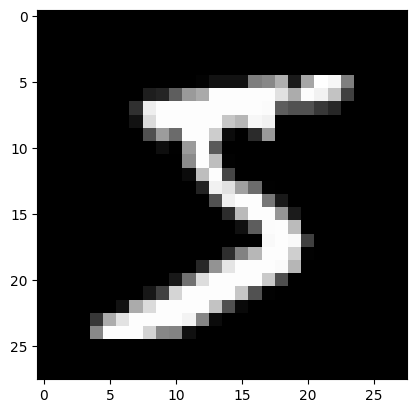

In [39]:
# Obtendo os dados de treino e teste já divididos
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

plt.imshow(X_treinamento[0], cmap = "gray")

In [40]:
#Visualiozando alguns dos números
pd.DataFrame(X_treinamento[4])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,55,148,210,253,253,113,87,148,55,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,87,232,252,253,189,210,252,252,253,168,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,57,242,252,190,65,5,12,182,252,253,116,0,0,0,0,0,0,0


In [41]:
#Mudança da dimensão, originalmente está 28X28 e precisamos de 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), 28*28))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [42]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [43]:
# Normalização, pois 255 é o valor máximo de um pixel
X_treinamento /= 255
X_teste /= 255

In [44]:
# Transformando para o formato dummy (temos 10 classes)
y_treinamento = to_categorical(y_treinamento, num_classes=10)
y_teste = to_categorical(y_teste, num_classes=10)
y_teste

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neuronios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(64, activation='relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation = "relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation = "relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(10, activation = "softmax"))

In [50]:
modelo.compile(optimizer="adam",loss="categorical_crossentropy", metrics = ["accuracy"])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 500, validation_data=(X_teste, y_teste))

Epoch 1/500
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4459 - accuracy: 0.8641 - val_loss: 0.1589 - val_accuracy: 0.9509
Epoch 2/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2273 - accuracy: 0.9332 - val_loss: 0.1221 - val_accuracy: 0.9625
Epoch 3/500
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1893 - accuracy: 0.9442 - val_loss: 0.1193 - val_accuracy: 0.9648
Epoch 4/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1656 - accuracy: 0.9512 - val_loss: 0.1017 - val_accuracy: 0.9691
Epoch 5/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1495 - accuracy: 0.9556 - val_loss: 0.1074 - val_accuracy: 0.9678
Epoch 6/500
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1400 - accuracy: 0.9592 - val_loss: 0.1063 - val_accuracy: 0.9698
Epoch 7/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1291 - accuracy: 0.9617 - val_loss: 0.0964 - val_ac

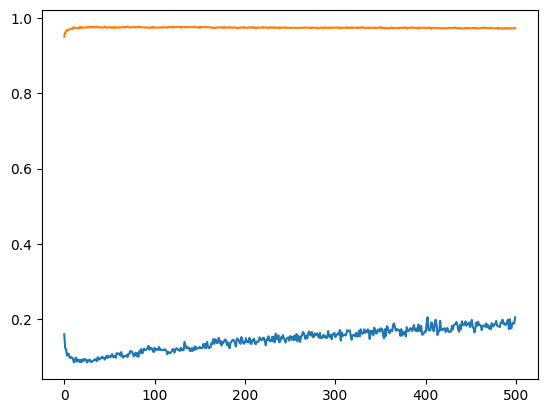

In [53]:
#Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro
plt.plot(historico.history["val_loss"])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [54]:
# Obtenção de previsões
previsoes = modelo.predict(X_teste)
previsoes

313/313 [==============================] - 1s 2ms/step


array([[5.4138568e-36, 4.6031748e-27, 5.9397808e-17, ..., 9.9999994e-01,
        7.1184109e-30, 2.2248001e-23],
       [1.4534725e-21, 4.4023521e-16, 9.9999994e-01, ..., 2.1469390e-20,
        8.3524950e-19, 6.5951742e-28],
       [2.8762853e-22, 9.9999994e-01, 1.2247320e-12, ..., 3.0588668e-10,
        3.7523349e-11, 9.3244855e-21],
       ...,
       [0.0000000e+00, 8.9632375e-28, 5.2005770e-22, ..., 4.5529136e-20,
        1.2805021e-32, 5.9574812e-17],
       [4.8070664e-38, 2.2119019e-32, 2.8746905e-25, ..., 5.0557134e-20,
        3.9622947e-30, 7.1304074e-27],
       [1.6422720e-33, 0.0000000e+00, 2.2107515e-27, ..., 0.0000000e+00,
        7.6663620e-30, 2.9871807e-37]], dtype=float32)

In [56]:
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 961,    1,    1,    1,    2,    3,    4,    2,    3,    2],
       [   0, 1122,    2,    2,    2,    1,    2,    1,    3,    0],
       [   1,    0, 1002,    7,    2,    1,    4,   10,    5,    0],
       [   0,    0,    2,  993,    0,    6,    0,    5,    0,    4],
       [   1,    0,    2,    1,  961,    0,    5,    2,    1,    9],
       [   2,    1,    0,    9,    1,  869,    2,    1,    5,    2],
       [   4,    1,    2,    0,    5,    9,  932,    0,    3,    2],
       [   0,    2,    8,    6,    2,    0,    0, 1006,    1,    3],
       [   1,    2,    7,    7,    6,    7,    4,    7,  927,    6],
       [   1,    2,    0,    5,   17,    4,    0,   10,    2,  968]])

In [ ]:
y_treinamento

In [ ]:
novo = X_treinamento[20]
# De matriz para vetor
novo = np.expand_dims(novo, axis = 0)
# Previsão
pred = modelo.predict(novo)
# maior valor
pred = [np.argmax(pred) for t in pred]
pred